# Forecasting Future Oil Demand with Ali: A Journey Through Data and ARIMA

# Introduction: Meet Ali, the Demand Forecaster

![picture](https://i.pinimg.com/736x/d8/13/fe/d813feae59ba45d0e51620612a3f0b53.jpg)

Ali, our data-savvy protagonist, works at ADNOC, where his job is to ensure that the company is always one step ahead in predicting oil demand. With a solid understanding of both business and technology, Ali uses the ARIMA model to forecast future oil demand, helping ADNOC make informed decisions. Join Ali as he walks us through his process, from preparing the data to making accurate predictions.

# 1. Setting the Scene: Importing Essential Libraries
Ali knows that the first step to any successful analysis is having the right tools. He starts by importing the necessary Python libraries:

In [ ]:
import pandas as pd  # Pandas is used for data manipulation and analysis, particularly for handling time series data in DataFrames.

import numpy as np  # NumPy provides support for numerical operations, including generating random numbers for simulating economic shocks and noise.

import matplotlib.pyplot as plt  # Matplotlib is used to create visualizations, such as plotting historical demand data and forecasted results.

from statsmodels.tsa.arima.model import ARIMA  # ARIMA (AutoRegressive Integrated Moving Average) is used for time series forecasting, helping to predict future values based on past trends.

import warnings
warnings.filterwarnings("ignore")  # This line is used to suppress warning messages, keeping the output clean and focused on the results.

**Pandas:**  Ali's go-to for managing and analyzing data.

**NumPy:**  Helps Ali handle numerical operations, including generating random factors like noise and economic shocks.

**Matplotlib:**  Ali uses this to create visualizations, turning raw data into insightful graphs.

**ARIMA:**  The core forecasting model Ali uses to predict future demand based on historical data.

**Warnings:**  Ali turns off warnings to keep his workspace neat and focused.

# 2. Understanding the Historical Data: The Backbone of Forecasting


![picture](https://i.pinimg.com/736x/a2/51/53/a2515368dbfee0f0fe6e7495d5c3f3e9.jpg)



Ali knows that good forecasting starts with understanding past data. Fortunately, he has access to a CSV file containing the last 3 years of monthly oil demand data. This data will serve as the foundation for his ARIMA model.

# 2.1. Reading the Data

Ali begins by loading the historical demand data from the CSV file:



In [ ]:
df = pd.read_csv('demand_forecast_dataset.csv', parse_dates=['Date'], index_col='Date') # create the data frame using pandas library
df.head() # show the first 5 rows from the data frame

Mounted at /content/drive


,Demand (in barrels)
Date,
2021-10-01,1424835
2021-11-01,1393086
2021-12-01,1432384
2022-01-01,1476151
2022-02-01,1388292


This line of code reads the data into a DataFrame, with the 'Date' column set as the index. Ali now has a well-organized dataset that spans the last 36 months.

# 2.2. Visualizing the Historical Data

Before jumping into forecasting, Ali decides to visualize the historical data to understand its trends and patterns:

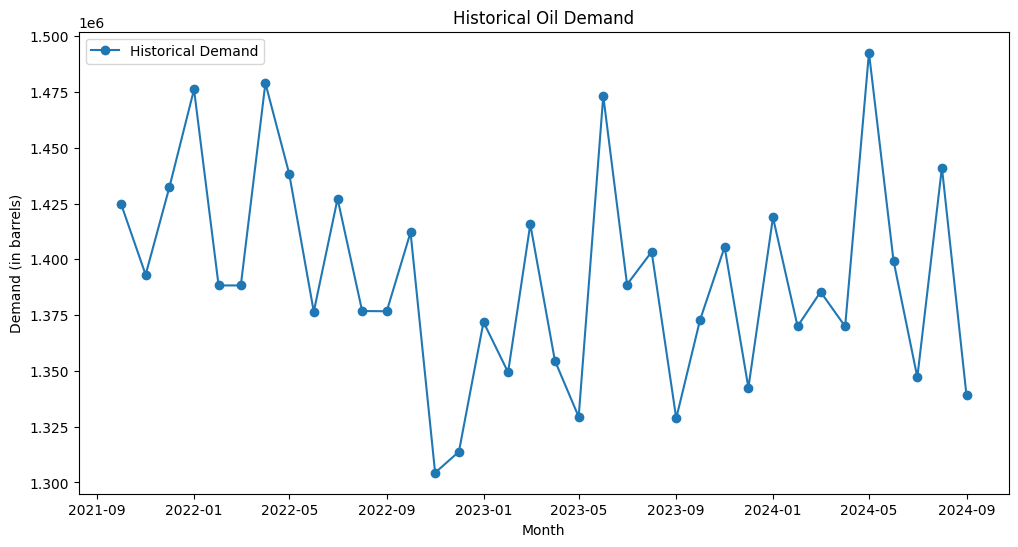

In [ ]:
# Create a new figure with a specified size for the plot
plt.figure(figsize=(12, 6))

# Plot the historical demand data with date on the x-axis and demand on the y-axis
plt.plot(df.index, df['Demand (in barrels)'], marker='o', label='Historical Demand')

# Set the title of the plot
plt.title('Historical Oil Demand')

# Label the x-axis as 'Date'
plt.xlabel('Month')

# Label the y-axis as 'Demand (in barrels)'
plt.ylabel('Demand (in barrels)')

# Add a legend to distinguish the historical data line
plt.legend()
# show the graph
plt.show()

# 2.3 Navigating the Externalities of Oil Demand
![picture](https://i.pinimg.com/736x/21/fe/d3/21fed3eb24d4707661f58d875cc4de8d.jpg)

**1. Seasonality:**
Ali knows that the cold winter months drive up the demand for oil as people need more heating. Recognizing this pattern, he adjusts his model to increase demand by 10% during December, January, and February, ensuring that his predictions reflect the real-world uptick in oil usage during these periods.

In [ ]:
# Create the date range for the last 3 years (36 months)
date_range = pd.date_range(end=pd.Timestamp.today().normalize(), periods=36, freq='MS')
# Seasonality: Higher demand in winter months (December, January, February)
seasonality = np.where(date_range.month.isin([12, 1, 2]), 1.1, 1.0)

**Economic Shocks:** Ali also understands that the economy is unpredictable. A sudden economic downturn or a spike in oil prices can cause fluctuations in demand. To mimic these real-world scenarios, Ali adds random economic shocks to his model, allowing for unexpected changes in demand that could arise from global or regional economic events.

In [ ]:
# Economic shocks: Random shocks to simulate economic events
np.random.seed(42)
economic_shocks = np.random.normal(loc=1.0, scale=0.02, size=len(date_range))  # Adds random economic fluctuations

**Special Events:** Ali knows that certain months might experience higher-than-usual demand due to special events, holidays, or industrial surges. To capture this, he randomly selects a few months in his model to simulate a demand spike, ensuring that his forecast can handle these occasional but significant deviations from the norm.

In [ ]:
# Special events or holidays: Randomly select a few months to have increased demand
special_events = np.ones(len(date_range))
event_indices = np.random.choice(len(date_range), size=3, replace=False)
special_events[event_indices] = np.random.uniform(1.05, 1.15, size=3)  # Increase demand by 5% to 15% during special events

**Noise:** Finally, Ali appreciates the inherent unpredictability in any data. Real-world demand is never perfectly smooth, so Ali adds a layer of random noise to his model. This small but crucial detail makes his simulated data more reflective of the minor day-to-day variations in demand.

In [ ]:
# Noise: Add some random noise to simulate real-world fluctuations
noise = np.random.normal(loc=1.0, scale=0.01, size=len(date_range))  # Adds small random variations to the demand data

This visualization gives Ali a clear picture of how demand has fluctuated over the past three years, providing valuable insights for the forecasting process.

# 3. The Power of ARIMA: Forecasting the Future
With the historical data ready, Ali turns to the ARIMA model to forecast demand for the next three months. ARIMA stands for AutoRegressive Integrated Moving Average and is a powerful tool for time series forecasting.

# 3.1. Model Fitting
Ali begins by fitting the ARIMA model to his historical data. He chooses an ARIMA(1, 1, 1) model, which uses one lagged term, first differences to make the data stationary, and one moving average term:

In [ ]:
# Create an ARIMA model with specified parameters for p, d, and q
model = ARIMA(df['Demand (in barrels)'], order=(1, 1, 1))

# Fit the ARIMA model to the historical demand data
model_fit = model.fit()



*   AR(1): The model uses the previous month’s demand to predict the next month’s.
*   I(1): The model takes the first difference to remove any trend in the data.
*   MA(1): The model accounts for past forecasting errors in its predictions.


# 3.2. Forecasting the Next Three Months
With the model fitted, Ali forecasts demand for the next three months:



In [ ]:
# Generate forecasts for the next 3 time periods (months in this case)
forecast = model_fit.forecast(steps=3)

# 3.3. Creating a Forecast DataFrame
Ali organizes the forecasted demand into a new DataFrame:

In [ ]:
# Create a date range for the forecasted periods
forecast_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=3, freq='MS')

# Create a DataFrame to store the forecasted demand values along with their corresponding dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Demand (in barrels)': forecast})

# Set the 'Date' column as the index of the DataFrame for easier time series handling
forecast_df.set_index('Date', inplace=True)


# 4. Visualizing the Future: Combining Historical and Forecasted Data

![picture](https://i.pinimg.com/736x/c5/49/6e/c5496eb17c1c232eabb4f5fafd73f04c.jpg)
Ali knows that a good visualization can turn complex data into clear insights. He plots both the historical demand and the forecasted demand:

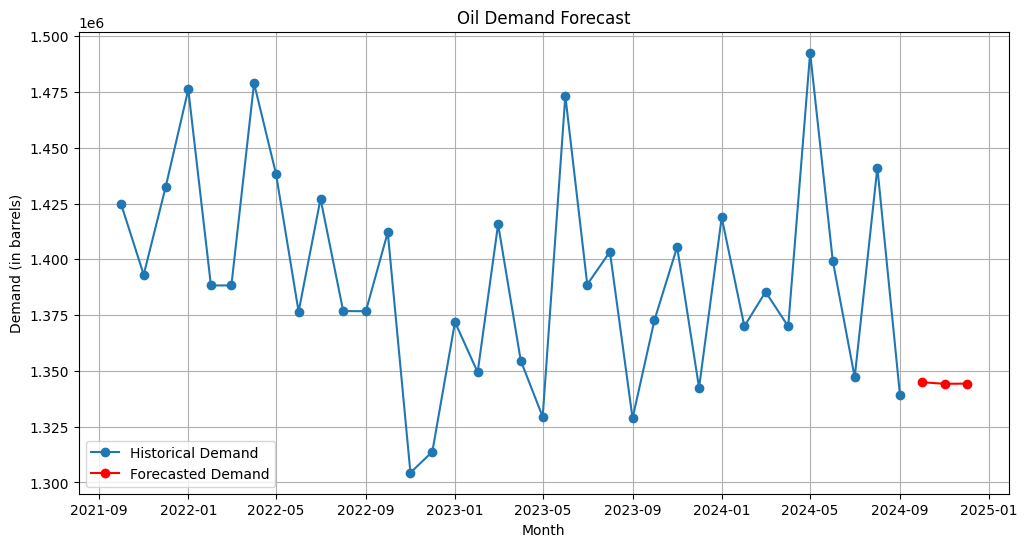

In [ ]:
# Create a new figure with a specified size for the plot
plt.figure(figsize=(12, 6))

# Plot the historical demand data with date on the x-axis and demand on the y-axis
plt.plot(df.index, df['Demand (in barrels)'], marker='o', label='Historical Demand')

# Plot the forecasted demand data with the same x-axis and y-axis, using a different color for distinction
plt.plot(forecast_df.index, forecast_df['Forecasted Demand (in barrels)'], marker='o', color='red', label='Forecasted Demand')

# Set the title of the plot
plt.title('Oil Demand Forecast')

# Label the x-axis as 'Date'
plt.xlabel('Month')

# Label the y-axis as 'Demand (in barrels)'
plt.ylabel('Demand (in barrels)')

# Add a legend to distinguish between historical and forecasted data
plt.legend()

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()

In this graph, the historical data provides context, while the forecasted data helps ADNOC plan for the future.

# Conclusion:  Ali's Mission Accomplished

Ali has successfully used the ARIMA model to forecast future oil demand at ADNOC. By leveraging historical data and advanced modeling techniques, he ensures that ADNOC stays ahead of the curve, optimizing its operations and planning for the future. Through this journey, Ali has demonstrated the power of data-driven decision-making in the oil industry.